Model was created using tensorflow instead of scikit-learn. This raised unforseen challenges in integrating with the Django website platform. Hence, this model, despite showing good performance, was not implemented on site.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Dataset 3.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [5]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [6]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [7]:
df.drop(['mort_acc'], axis = 1, inplace = True) #accounts for most null values

In [8]:
obj_features = []
for x in df.columns:
    if type(df[x][1]) == str:
        obj_features.append(x)

In [9]:
obj_features

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [10]:
df['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [11]:
df['term'] = df['term'].apply(lambda x: pd.to_numeric(x[:3]))

In [12]:
df['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [13]:
df['sub_grade'].value_counts() 

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

In [14]:
df.drop('grade', axis = 1, inplace = True)

In [15]:
sub_grade = pd.get_dummies(df['sub_grade'], drop_first = True)

In [16]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [17]:
df['emp_length'] = df['emp_length'].str.extract('(\d+)').apply(lambda x: pd.to_numeric(x))

In [18]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [19]:
df.drop('emp_title', axis = 1, inplace = True)

In [20]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [21]:
home_ownership = pd.get_dummies(df['home_ownership'], drop_first = True)

In [22]:
df['verification_status'].value_counts() 

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [23]:
verification_status = pd.get_dummies(df['verification_status'], drop_first = True)

In [24]:
df['issue_d'].head() 

0    Jan-2015
1    Jan-2015
2    Jan-2015
3    Nov-2014
4    Apr-2013
Name: issue_d, dtype: object

In [25]:
df.drop('issue_d', axis = 1, inplace = True)

In [26]:
df['loan_status'].value_counts() 

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [27]:
df['loan_status'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [28]:
df['purpose'].value_counts() 

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [29]:
purpose = pd.get_dummies(df['purpose'], drop_first = True)

In [30]:
df['title'].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [31]:
df.drop('title', axis = 1, inplace = True)

In [32]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [33]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: x.split('-')[1])

In [34]:
df['initial_list_status'].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [35]:
initial_list_status = pd.get_dummies(df['initial_list_status'], drop_first = True)

In [36]:
df['application_type'].value_counts() 

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [37]:
application_type = pd.get_dummies(df['application_type'], drop_first = True)

In [38]:
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [39]:
df['address'] = df['address'].apply(lambda x: x[-5:])

In [40]:
df['address'].value_counts() 

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: address, dtype: int64

In [41]:
address = pd.get_dummies(df['address'], drop_first = True)

In [42]:
df = pd.concat([df.drop(['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'address'], axis = 1), sub_grade, home_ownership, verification_status, purpose, initial_list_status, application_type, address], axis = 1)

In [43]:
df.dropna(inplace = True)

In [44]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,earliest_cr_line,open_acc,...,JOINT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,10.0,117000.0,1,26.24,1990,16.0,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,4.0,65000.0,1,22.05,2004,17.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,1.0,43057.0,1,12.79,2007,13.0,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,6.0,54000.0,1,2.60,2006,6.0,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,9.0,55000.0,0,33.95,1999,13.0,...,0,0,1,0,0,0,0,0,0,0


In [89]:
sub1 = df[df['loan_status'] == 0]
sub2 = df[df['loan_status'] == 1].sample(n = 100000)
df = pd.concat([sub1, sub2])
df.reset_index(inplace = True)
df.drop('index', axis = 1, inplace = True)

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler = MinMaxScaler()

In [92]:
scaled_features = scaler.fit_transform(df.drop('loan_status', axis = 1))

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X = scaled_features
y = df['loan_status'].values

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [96]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [97]:
model = Sequential()

model.add(Dense(units = 78, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(units = 36, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(units = 18, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'Adam', loss = 'binary_crossentropy')

Epoch 1/25
807/807 [==============================] - 4s 4ms/step - loss: 0.4647 - val_loss: 0.3709
Epoch 2/25
807/807 [==============================] - 3s 4ms/step - loss: 0.3797 - val_loss: 0.3646
Epoch 3/25
807/807 [==============================] - 3s 4ms/step - loss: 0.3720 - val_loss: 0.3639
Epoch 4/25
807/807 [==============================] - 3s 4ms/step - loss: 0.3686 - val_loss: 0.3630
Epoch 5/25
807/807 [==============================] - 3s 3ms/step - loss: 0.3667 - val_loss: 0.3614
Epoch 6/25
807/807 [==============================] - 3s 3ms/step - loss: 0.3655 - val_loss: 0.3608
Epoch 7/25
807/807 [==============================] - 3s 4ms/step - loss: 0.3638 - val_loss: 0.3587
Epoch 8/25
807/807 [==============================] - 3s 4ms/step - loss: 0.3640 - val_loss: 0.3604
Epoch 9/25
807/807 [==============================] - 3s 4ms/step - loss: 0.3631 - val_loss: 0.3587
Epoch 10/25
807/807 [==============================] - 3s 4ms/step - loss: 0.3626 - val_loss: 0.3584

<AxesSubplot:>

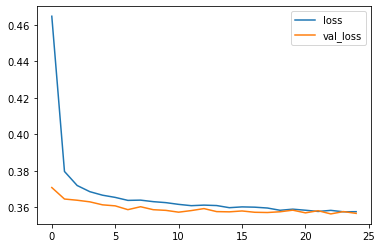

In [98]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 25, batch_size = 128)
loss = pd.DataFrame(model.history.history)
loss.plot()

In [99]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

1383/1383 [==============================] - 2s 1ms/step


In [100]:
from sklearn.metrics import confusion_matrix, classification_report

In [101]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[17721  3935]
 [ 4818 17773]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80     21656
           1       0.82      0.79      0.80     22591

    accuracy                           0.80     44247
   macro avg       0.80      0.80      0.80     44247
weighted avg       0.80      0.80      0.80     44247

